# Clean up the spreadsheet
Select only Task 2 patients and join the endpoints

In [1]:
import pandas as pd
import numpy as np
import os

from preprocessor.tabular import tabular_processor_ss as tp

%load_ext autoreload
%autoreload 2

In [3]:
data = pd.read_csv("../data/hecktor2022_clinical_info_training.csv")
endpoint = pd.read_csv("../data/hecktor2022_endpoint_training.csv")

In [6]:
data = data[data['Task 2']==1]

In [12]:
out = pd.merge(data, endpoint, on = 'PatientID', how = 'left')

In [13]:
out.to_csv("../data/hecktor2022_training_data.csv", index = False)

## Data for HPV model

In [2]:
all = pd.read_csv("../data/hecktor2022_training_data.csv")
all

,PatientID,Task 1,Task 2,CenterID,Gender,Age,Weight,Tobacco,Alcohol,Performance status,"HPV status (0=-, 1=+)",Surgery,Chemotherapy,Relapse,RFS
0,CHUM-001,1,1,1,M,82,80.0,NaN,NaN,NaN,NaN,NaN,1,0,1704
1,CHUM-002,1,1,1,M,73,55.0,NaN,NaN,NaN,NaN,NaN,1,1,439
2,CHUM-006,1,1,1,M,65,101.0,NaN,NaN,NaN,NaN,NaN,1,0,1186
3,CHUM-007,1,1,1,F,70,80.0,NaN,NaN,NaN,NaN,NaN,0,0,1702
4,CHUM-008,1,1,1,F,67,91.0,NaN,NaN,NaN,NaN,NaN,1,0,1499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,HMR-028,1,1,7,M,73,87.0,NaN,NaN,NaN,NaN,NaN,1,0,419
484,HMR-029,1,1,7,M,57,NaN,NaN,NaN,NaN,1.0,NaN,1,0,1736
485,HMR-030,1,1,7,M,70,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1385
486,HMR-034,1,1,7,F,85,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1570


In [3]:
hpv = all[~all["HPV status (0=-, 1=+)"].isnull()]
hpv

,PatientID,Task 1,Task 2,CenterID,Gender,Age,Weight,Tobacco,Alcohol,Performance status,"HPV status (0=-, 1=+)",Surgery,Chemotherapy,Relapse,RFS
7,CHUM-012,1,1,1,M,61,68.0,NaN,NaN,NaN,1.0,NaN,1,0,1518
9,CHUM-014,1,1,1,M,59,120.0,NaN,NaN,NaN,1.0,NaN,1,0,1513
11,CHUM-016,1,1,1,M,58,82.0,NaN,NaN,NaN,1.0,NaN,1,0,1410
15,CHUM-021,1,1,1,M,63,78.0,NaN,NaN,NaN,1.0,NaN,1,0,1243
16,CHUM-022,1,1,1,M,56,70.0,NaN,NaN,NaN,1.0,NaN,1,0,1256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,HGJ-090,1,1,6,M,53,70.0,NaN,NaN,NaN,1.0,1.0,1,0,717
468,HGJ-091,1,1,6,M,65,67.0,NaN,NaN,NaN,1.0,0.0,1,0,623
469,HGJ-092,1,1,6,M,53,76.0,NaN,NaN,NaN,1.0,1.0,1,0,703
482,HMR-025,1,1,7,M,58,82.0,NaN,NaN,NaN,1.0,NaN,1,0,1024


In [4]:
hpv.to_csv("../data/hpv/pts_with_known_hpv.csv", index = False)

In [5]:
hpv_missing = all[all["HPV status (0=-, 1=+)"].isnull()]

In [6]:
hpv_missing.to_csv("../data/pts_with_missing_hpv.csv", index = False)

# Plot

In [2]:
all = pd.read_csv("../data/hecktor2022_training_data.csv")
all

,PatientID,Task 1,Task 2,CenterID,Gender,Age,Weight,Tobacco,Alcohol,Performance status,"HPV status (0=-, 1=+)",Surgery,Chemotherapy,Relapse,RFS
0,CHUM-001,1,1,1,M,82,80.0,NaN,NaN,NaN,NaN,NaN,1,0,1704
1,CHUM-002,1,1,1,M,73,55.0,NaN,NaN,NaN,NaN,NaN,1,1,439
2,CHUM-006,1,1,1,M,65,101.0,NaN,NaN,NaN,NaN,NaN,1,0,1186
3,CHUM-007,1,1,1,F,70,80.0,NaN,NaN,NaN,NaN,NaN,0,0,1702
4,CHUM-008,1,1,1,F,67,91.0,NaN,NaN,NaN,NaN,NaN,1,0,1499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,HMR-028,1,1,7,M,73,87.0,NaN,NaN,NaN,NaN,NaN,1,0,419
484,HMR-029,1,1,7,M,57,NaN,NaN,NaN,NaN,1.0,NaN,1,0,1736
485,HMR-030,1,1,7,M,70,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1385
486,HMR-034,1,1,7,F,85,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1570


<Axes: ylabel='Frequency'>

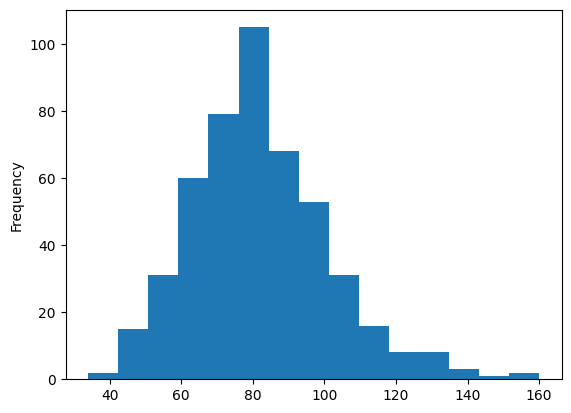

In [7]:
all['Weight'].plot.hist(bins=15)

In [8]:
(160-50)/11

10.0